ID: Identificador único de cada curso vendido.

Nome do Curso: Nome do curso vendido na plataforma.

Quantidade de Vendas: Número de vendas realizadas para cada curso.

Preço Unitário: Preço unitário do curso.

Data: Data da venda do curso.

- Calcular a receita total gerada pela venda dos cursos.
- Identificar o curso com o maior número de vendas.
- Visualizar a distribuição das vendas ao longo do tempo através de gráficos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
vend_cursos = pd.read_csv(r"..\data\venda_cursos_online.csv.txt",index_col=0)

In [17]:
vend_cursos

,Nome do Curso,Quantidade de Vendas,Preço Unitário,Data
ID,,,,
1,Introdução à Programação em Python,50,39.9,2023-01-01
2,Desenvolvimento Web com HTML e CSS,30,59.9,2023-01-02
3,JavaScript Avançado: Frameworks e Bibliotecas,20,79.9,2023-01-03
4,Introdução ao Machine Learning,15,99.9,2023-01-04
5,Desenvolvimento Mobile com React Native,25,69.9,2023-01-05
6,Arquitetura de Microserviços,12,89.9,2023-01-06
7,Banco de Dados SQL e NoSQL,18,79.9,2023-01-07
8,Segurança da Informação: Fundamentos,10,109.9,2023-01-08
9,Cloud Computing com AWS,22,99.9,2023-01-09


In [18]:
vend_cursos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 1 to 25
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nome do Curso         25 non-null     object 
 1   Quantidade de Vendas  25 non-null     int64  
 2   Preço Unitário        25 non-null     float64
 3   Data                  25 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1000.0+ bytes


In [19]:
vend_cursos['Quantidade de Vendas'].sum()

449

In [105]:
vend_cursos.loc[vend_cursos['Quantidade de Vendas'].idxmax()][0]

'Introdução à Programação em Python'

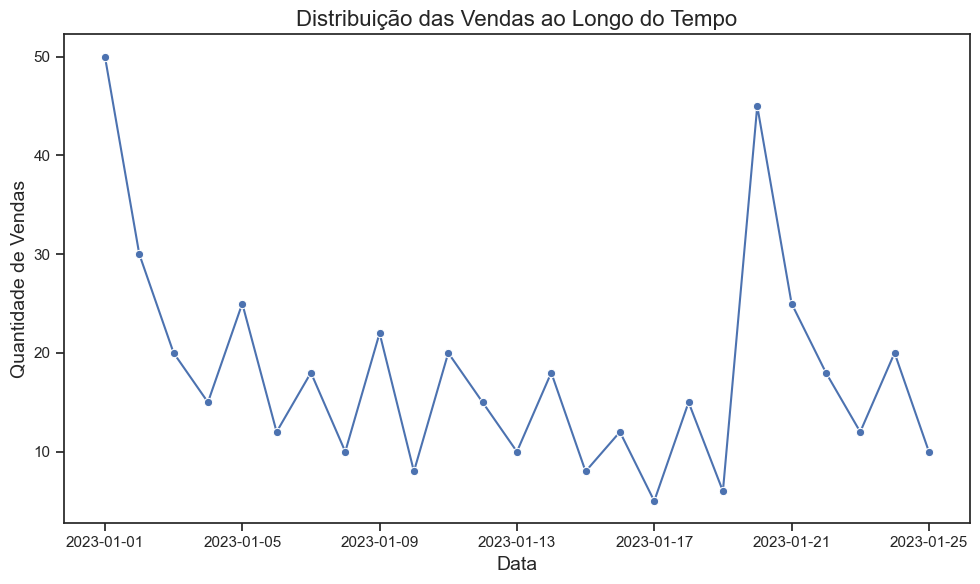

In [99]:
sns.set_theme(style="ticks")

plt.figure(figsize=(10, 6))
sns.lineplot(x="Data", y="Quantidade de Vendas", data=vend_cursos, marker="o", dashes=False)
plt.title('Distribuição das Vendas ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Quantidade de Vendas', fontsize=14)
plt.tight_layout()
plt.show()

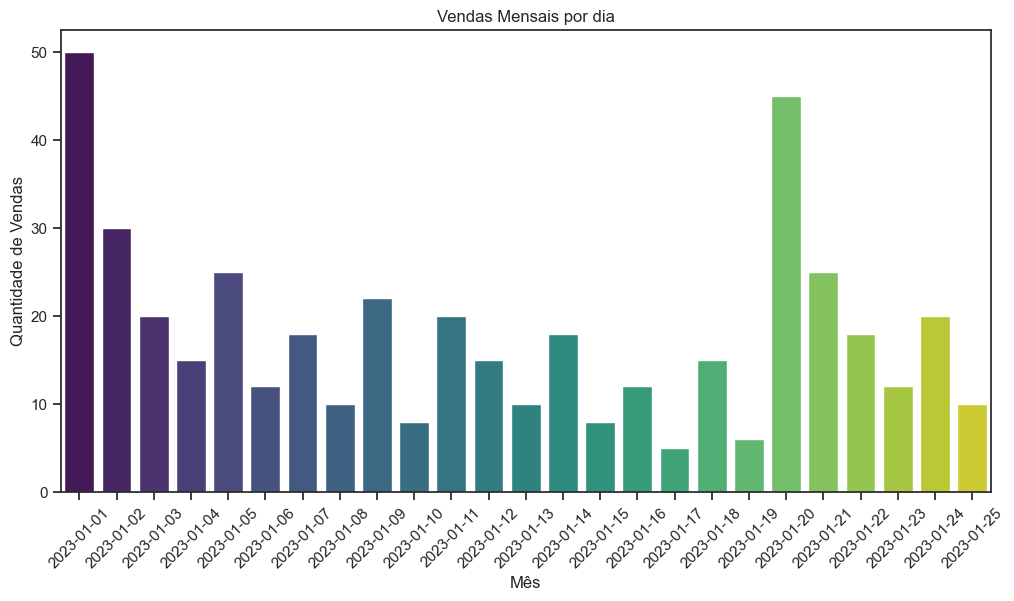

In [102]:

vend_cursos['Dia'] = vend_cursos['Data'].dt.to_period('d')
vendas_mensais = vend_cursos.groupby('Dia')['Quantidade de Vendas'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_mensais, x="Dia", y="Quantidade de Vendas", palette="viridis")
plt.title('Vendas Mensais por dia')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.show()
